In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, \
                            precision_score, recall_score, accuracy_score


In [64]:
df = pd.read_csv('data/churn.csv')
d = {'False.': False, 'True.':True}
d2 = {'yes':True, 'no':False}
df['Churn?'] = df['Churn?'].map(d)
df["Int'l Plan"] = df["Int'l Plan"].map(d2)
df['VMail Plan'] = df['VMail Plan'].map(d2)
df=df.drop('Phone',axis=1)
df=df.drop('Area Code',axis=1)
df=df.drop('State',axis=1)
y = df.pop('Churn?').values
X = df.values
df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [65]:
from sklearn.cross_validation import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.21234124)

In [68]:
rf1 = RF()
rf1.fit(X_train,y_train)
print 'Confusion Matrix: ', sklearn.metrics.confusion_matrix(y_test,rf1.predict(X_test))
print 'Precision Score: ', precision_score(y_test,rf1.predict(X_test))
print 'Accuracy Score: ', accuracy_score(y_test,rf1.predict(X_test))

 Confusion Matrix:  [[590   6]
 [ 34  78]]
Precision Score:  0.928571428571
Accuracy Score:  0.943502824859


In [76]:
rf2 = RF(oob_score=True,n_estimators=100)
rf2.fit(X_train,y_train)
print 'Confusion Matrix: ', sklearn.metrics.confusion_matrix(y_test,rf1.predict(X_test))
print 'Precision Score: ', precision_score(y_test,rf1.predict(X_test))
print 'Accuracy Score: ', accuracy_score(y_test,rf1.predict(X_test))
print 'oob score: ',rf2.oob_score_

Confusion Matrix:  [[590   6]
 [ 34  78]]
Precision Score:  0.928571428571
Accuracy Score:  0.943502824859
oob score:  0.954285714286


In [92]:
sorted_mask = np.argsort(rf2.feature_importances_)

for i in zip(df.columns[sorted_mask],rf2.feature_importances_[sorted_mask]):
    print i
 

('VMail Plan', 0.025661349846041345)
('Eve Calls', 0.026429728495178745)
('Night Calls', 0.028273274412854429)
('Account Length', 0.029445102706644594)
('Day Calls', 0.03074450482713726)
('VMail Message', 0.033742807268949196)
('Night Mins', 0.037354072556329249)
('Night Charge', 0.038877158160690199)
('Intl Mins', 0.040441028968880549)
('Intl Charge', 0.044076165141828508)
('Intl Calls', 0.047301331696158792)
('Eve Charge', 0.069333932119450117)
('Eve Mins', 0.071934316050580399)
("Int'l Plan", 0.078447680615065699)
('CustServ Calls', 0.12688196608512337)
('Day Charge', 0.13430053436282546)
('Day Mins', 0.13675504668626204)


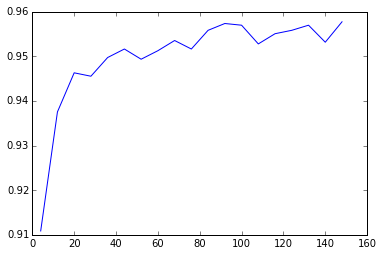

In [104]:
x = np.arange(4,150,8)
scores = []
for i in xrange(len(x)):
    rf2 = RF(oob_score=True,n_estimators=x[i])
    rf2.fit(X_train,y_train)
    scores += [rf2.oob_score_]
plt.plot(x,scores)

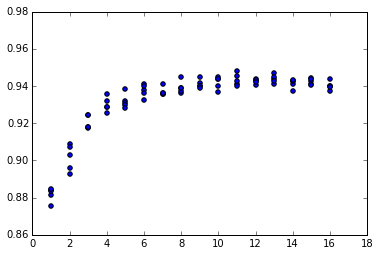

In [111]:
x = np.arange(1,X.shape[1])
scores = []
x2=[]
for i in xrange(len(x)):
    for j in xrange(5):
        rf2 = RF(oob_score=True,max_features=x[i])
        rf2.fit(X_train,y_train)
        scores += [rf2.oob_score_]
        x2 += [x[i]]
plt.scatter(x2,scores, alpha =0.5)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15


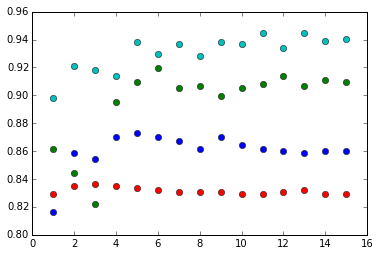

In [140]:
x = np.arange(1,16)
score_LR = []
score_DT = []
score_KNN = []
score_RF = []
for i in range(1,len(x)+1):
    LR = LogisticRegression(C = 1./i)
    LR.fit(X_train,y_train)
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train,y_train)
    rf = RF(n_estimators=i)
    rf.fit(X_train,y_train)
    DT = DecisionTreeClassifier(max_features=i)
    DT.fit(X_train,y_train)
    
    score_LR += [accuracy_score(y_test,LR.predict(X_test))]
    score_DT += [accuracy_score(y_test,DT.predict(X_test))]
    score_KNN += [accuracy_score(y_test,KNN.predict(X_test))]
    score_RF += [accuracy_score(y_test,rf.predict(X_test))]

plt.plot(x,score_LR,'or')
plt.plot(x,score_DT,'og')
plt.plot(x,score_KNN,'ob')
plt.plot(x,score_RF,'oc')
    




In [131]:
cd code

/Users/datascientist/Desktop/random-forest/code


In [133]:
from roc import plot_roc

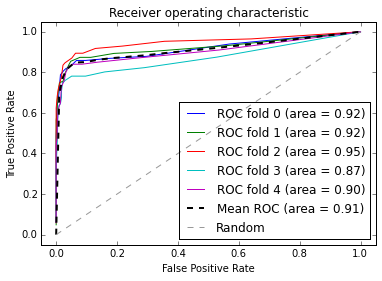

In [136]:
plot_roc(X, y, RF, n_estimators=20)


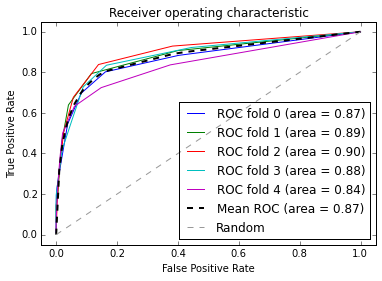

None


In [142]:
a = plot_roc(X, y, KNeighborsClassifier, n_neighbors=10)
print a

(18, -1)

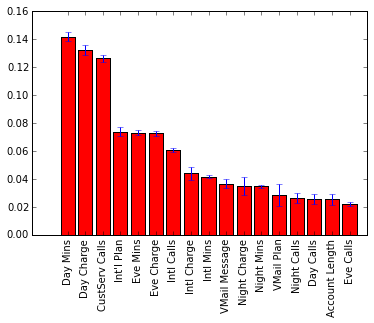

In [178]:
n = 10
imports = np.zeros((n,X.shape[1]))
for i in xrange(n):
    rf2 = RF(oob_score=True,max_features=6,n_estimators=50)
    rf2.fit(X_train,y_train)
    imports[i] = rf2.feature_importances_

means = np.mean(imports,axis=0)
stds = np.std(imports,axis=0)


sorted_mask = np.argsort(-1*means)[::-1]
plt.bar(range(X.shape[1]), means[sorted_mask],
       color="r", yerr=stds, align="center")

plt.xticks(range(X.shape[1]),df.columns[sorted_mask],
          rotation='vertical')
plt.xlim(X.shape[1]+1,-1)

In [156]:
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")

(10, 17)

In [157]:
means.shape

(17,)

In [187]:
df_date = pd.read_clipboard()

In [189]:
df_date.head()

,Order- Date Joined,State Unit of Study,State Abbrev.,State Capital
0,01 - 1787 Dec 07,Delaware,DE,Dover
1,02 - 1787 Dec 12,Pennsylvania,PA,Harrisburg
2,03 - 1787 Dec 18,New Jersey,NJ,Trenton
3,04 - 1788 Jan 02,Georgia,GA,Atlanta
4,05 - 1788 Jan 09,Connecticut,CT,Hartford


In [194]:
df_date['Order- Date Joined']

KeyError: 'Order- Date Joined'

In [273]:
d = df_date.iloc[:,0]
df_date['year'] = ((d.str.replace(r'[0-9][0-9] - ','').str.slice(0,4)).astype(int))
df_date



,Order- Date Joined,State Unit of Study,State Abbrev.,State Capital,year
0,01 - 1787 Dec 07,Delaware,DE,Dover,1787
1,02 - 1787 Dec 12,Pennsylvania,PA,Harrisburg,1787
2,03 - 1787 Dec 18,New Jersey,NJ,Trenton,1787
3,04 - 1788 Jan 02,Georgia,GA,Atlanta,1788
4,05 - 1788 Jan 09,Connecticut,CT,Hartford,1788
5,06 - 1788 Feb 06,Massachusetts,MA,Boston,1788
6,07 - 1788 Apr 28,Maryland,MD,Annapolis,1788
7,08 - 1788 May 23,South Carolina,SC,Columbia,1788
8,09 - 1788 Jun 21,New Hampshire,NH,Concord,1788
9,10 - 1788 Jun 25,Virginia,VA,Richmond,1788


In [283]:
df = pd.read_csv('../data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [284]:
df_awe = pd.merge(df,df_date,left_on='State', right_on='State Abbrev.',how='inner')

In [295]:
df = pd.read_csv('../data/churn.csv')
df_awe = pd.merge(df,df_date,left_on='State', right_on='State Abbrev.',how='inner')
d = {'False.': False, 'True.':True}
d2 = {'yes':True, 'no':False}
df_awe['Churn?'] = df_awe['Churn?'].map(d)
df_awe["Int'l Plan"] = df_awe["Int'l Plan"].map(d2)
df_awe['VMail Plan'] = df_awe['VMail Plan'].map(d2)
df_awe=df_awe.drop('Phone',axis=1)
df_awe=df_awe.drop('Area Code',axis=1)
df_awe=df_awe.drop('State',axis=1)
df_awe=df_awe.drop(['State Abbrev.', 'State Capital'], axis =1)
df_awe=df_awe.drop('Order- Date Joined ', axis=1)
df_awe=df_awe.drop('State Unit of Study ', axis=1)
y = df_awe.pop('Churn?').values
X = df_awe.values
df_awe.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,year
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1861
1,70,False,False,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,1861
2,92,True,False,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,1861
3,137,False,False,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,1861
4,132,False,False,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,1861


(19, -1)

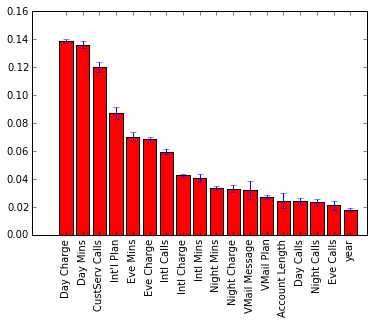

In [297]:
n = 10
imports = np.zeros((n,X.shape[1]))
for i in xrange(n):
    rf2 = RF(oob_score=True,max_features=6,n_estimators=50)
    rf2.fit(X,y)
    imports[i] = rf2.feature_importances_

means = np.mean(imports,axis=0)
stds = np.std(imports,axis=0)


sorted_mask = np.argsort(-1*means)[::-1]
plt.bar(range(X.shape[1]), means[sorted_mask],
       color="r", yerr=stds, align="center")

plt.xticks(range(X.shape[1]),df_awe.columns[sorted_mask],
          rotation='vertical')
plt.xlim(X.shape[1]+1,-1)